# **Hyperparameter Tuning for Resume Classification**

This notebook performs manual hyperparameter tuning for resume classification for the following models:


*   Logistic Regression
*   Multinomial Naive Bayes
*   Linear SVM

We manually loop over combinations of

*   TF-IDF Hyperparameter: max_features | ngram_range
*   Model-specific Hyperparameters: C (Logistic Regression & SVM) | alpha (Naive Bayes)

Goal is to identify combination that has the highest macro F1-score.

Results are in a single df and visualized.

In [5]:
import pandas as pd
import numpy as np
import itertools

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_Resume.csv to Cleaned_Resume.csv


In [3]:
resumes_df = pd.read_csv('Cleaned_Resume.csv')
resumes_df.head()

,Resume_str,Category,Cleaned_Resume,Lower_Only,Skill_NGrams,Resume_Length
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,administratormarketing associate administrator...,hr administrator/marketing associate\...,"activity employment compensation, ad advertisi...",489
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,specialist operation summary versatile medium ...,"hr specialist, us hr operations ...","asset management, background check, background...",515
2,HR DIRECTOR Summary Over 2...,HR,director summary year experience recruiting pl...,hr director summary over 2...,"adjutant general, administration midlevel, adm...",691
3,HR SPECIALIST Summary Dedica...,HR,specialist summary dedicated driven dynamic ye...,hr specialist summary dedica...,"access outlook powerpoint, action taken, actio...",258
4,HR MANAGER Skill Highlights ...,HR,manager skill highlight skill department start...,hr manager skill highlights ...,"assist creation, benefit administration, best ...",833


In [6]:
X = resumes_df["Cleaned_Resume"].fillna("")
y = resumes_df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 1987
Testing samples: 497


In [7]:
def grid_search(
    X_train, y_train, X_test, y_test,
    param_grid, model_class, model_param_names
):
    keys, values = zip(*param_grid.items())
    combinations = list(itertools.product(*values))

    results = []

    for combo in combinations:
        params = dict(zip(keys, combo))
        print(f"Training with parameters: {params}")

        # TF-IDF
        tfidf = TfidfVectorizer(
            max_features=params['max_features'],
            ngram_range=params['ngram_range'],
            stop_words='english'
        )

        X_train_tfidf = tfidf.fit_transform(X_train)
        X_test_tfidf = tfidf.transform(X_test)

        # Extract model-specific params
        model_kwargs = {p: params[p] for p in model_param_names}

        clf = model_class(**model_kwargs)
        clf.fit(X_train_tfidf, y_train)
        y_pred = clf.predict(X_test_tfidf)

        report = classification_report(
            y_test, y_pred, output_dict=True, zero_division=0
        )
        acc = accuracy_score(y_test, y_pred)

        result = {
            'accuracy': acc * 100,
            'macro_f1': report['macro avg']['f1-score'] * 100,
            'model': model_class.__name__,
            **params
        }
        results.append(result)

    return pd.DataFrame(results)

In [9]:
#Logistic Regresssion Tuning

param_grid_lr = {
    'max_features': [5000, 10000],
    'ngram_range': [(1,1), (1,2)],
    'C': [0.1, 1, 10]
}

results_lr = grid_search(
    X_train, y_train, X_test, y_test,
    param_grid_lr,
    LogisticRegression,
    model_param_names=['C']
)

Training with parameters: {'max_features': 5000, 'ngram_range': (1, 1), 'C': 0.1}
Training with parameters: {'max_features': 5000, 'ngram_range': (1, 1), 'C': 1}
Training with parameters: {'max_features': 5000, 'ngram_range': (1, 1), 'C': 10}
Training with parameters: {'max_features': 5000, 'ngram_range': (1, 2), 'C': 0.1}
Training with parameters: {'max_features': 5000, 'ngram_range': (1, 2), 'C': 1}
Training with parameters: {'max_features': 5000, 'ngram_range': (1, 2), 'C': 10}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 1), 'C': 0.1}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 1), 'C': 1}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 1), 'C': 10}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 2), 'C': 0.1}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 2), 'C': 1}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 2), 'C': 10}


In [10]:
#Naive Bayes Tuning
param_grid_nb = {
    'max_features': [5000, 10000],
    'ngram_range': [(1,1), (1,2)],
    'alpha': [0.1, 1, 10]
}

results_nb = grid_search(
    X_train, y_train, X_test, y_test,
    param_grid_nb,
    MultinomialNB,
    model_param_names=['alpha']
)

Training with parameters: {'max_features': 5000, 'ngram_range': (1, 1), 'alpha': 0.1}
Training with parameters: {'max_features': 5000, 'ngram_range': (1, 1), 'alpha': 1}
Training with parameters: {'max_features': 5000, 'ngram_range': (1, 1), 'alpha': 10}
Training with parameters: {'max_features': 5000, 'ngram_range': (1, 2), 'alpha': 0.1}
Training with parameters: {'max_features': 5000, 'ngram_range': (1, 2), 'alpha': 1}
Training with parameters: {'max_features': 5000, 'ngram_range': (1, 2), 'alpha': 10}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 1), 'alpha': 0.1}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 1), 'alpha': 1}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 1), 'alpha': 10}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 2), 'alpha': 0.1}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 2), 'alpha': 1}
Training with parameters: {'max_features': 10000, 'ngram_ran

In [11]:
#SVM Tuning
param_grid_svm = {
    'max_features': [5000, 10000],
    'ngram_range': [(1,1), (1,2)],
    'C': [0.1, 1, 10]
}

results_svm = grid_search(
    X_train, y_train, X_test, y_test,
    param_grid_svm,
    LinearSVC,
    model_param_names=['C']
)

Training with parameters: {'max_features': 5000, 'ngram_range': (1, 1), 'C': 0.1}
Training with parameters: {'max_features': 5000, 'ngram_range': (1, 1), 'C': 1}
Training with parameters: {'max_features': 5000, 'ngram_range': (1, 1), 'C': 10}
Training with parameters: {'max_features': 5000, 'ngram_range': (1, 2), 'C': 0.1}
Training with parameters: {'max_features': 5000, 'ngram_range': (1, 2), 'C': 1}
Training with parameters: {'max_features': 5000, 'ngram_range': (1, 2), 'C': 10}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 1), 'C': 0.1}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 1), 'C': 1}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 1), 'C': 10}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 2), 'C': 0.1}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 2), 'C': 1}
Training with parameters: {'max_features': 10000, 'ngram_range': (1, 2), 'C': 10}


In [12]:
final_results = pd.concat([results_lr, results_nb, results_svm])
final_results.sort_values("macro_f1", ascending=False).head()


,accuracy,macro_f1,model,max_features,ngram_range,C,alpha
10,71.629779,66.783593,LinearSVC,10000,"(1, 2)",1.0,NaN
4,71.428571,66.615793,LinearSVC,5000,"(1, 2)",1.0,NaN
11,71.428571,65.929994,LinearSVC,10000,"(1, 2)",10.0,NaN
5,69.215292,64.970907,LogisticRegression,5000,"(1, 2)",10.0,NaN
5,70.020121,64.672673,LinearSVC,5000,"(1, 2)",10.0,NaN


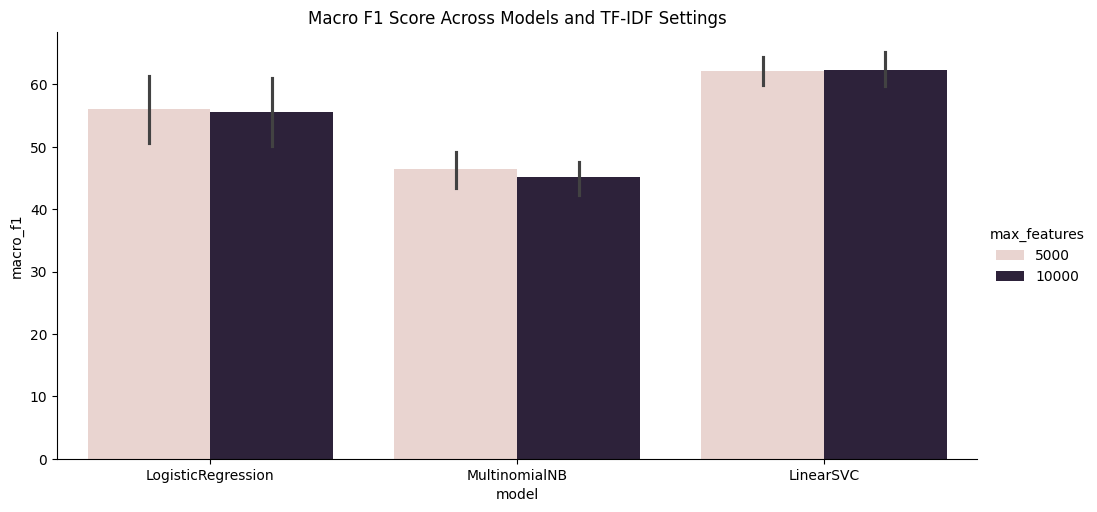

In [13]:
sns.catplot(
    data=final_results,
    x="model",
    y="macro_f1",
    hue="max_features",
    kind="bar",
    height=5,
    aspect=2
)
plt.title("Macro F1 Score Across Models and TF-IDF Settings")
plt.show()

In [14]:
best_row = final_results.sort_values("macro_f1", ascending=False).iloc[0]
print("Best configuration:")
print(best_row)

Best configuration:
accuracy        71.629779
macro_f1        66.783593
model           LinearSVC
max_features        10000
ngram_range        (1, 2)
C                     1.0
alpha                 NaN
Name: 10, dtype: object
